# Mailout dataset: EDA & pre-processing steps

# 00. Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
  
%matplotlib inline


### my utils

from eda_utils import *

# 01. Load data

In [2]:
%%time
train = pd.read_csv('../arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';', low_memory = False, index_col = 'LNR') 
train

CPU times: user 850 ms, sys: 160 ms, total: 1.01 s
Wall time: 1.01 s


,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,RESPONSE,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
1763,2,1.0,8.0,NaN,NaN,NaN,NaN,8.0,15.0,0.0,...,5.0,2.0,1.0,6.0,9.0,3.0,3,0,2,4
1771,1,4.0,13.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,1.0,2.0,1.0,4.0,9.0,7.0,1,0,2,3
1776,1,1.0,9.0,NaN,NaN,NaN,NaN,7.0,0.0,NaN,...,6.0,4.0,2.0,NaN,9.0,2.0,3,0,1,4
1460,2,1.0,6.0,NaN,NaN,NaN,NaN,6.0,4.0,0.0,...,8.0,11.0,11.0,6.0,9.0,1.0,3,0,2,4
1783,2,1.0,9.0,NaN,NaN,NaN,NaN,9.0,53.0,0.0,...,2.0,2.0,1.0,6.0,9.0,3.0,3,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66338,2,1.0,0.0,NaN,NaN,NaN,NaN,10.0,1.0,0.0,...,1.0,1.0,1.0,4.0,8.0,7.0,1,0,1,4
67629,-1,1.0,0.0,NaN,NaN,NaN,NaN,14.0,1.0,0.0,...,1.0,1.0,1.0,5.0,9.0,7.0,1,0,1,3
68273,1,1.0,16.0,NaN,NaN,NaN,NaN,10.0,2.0,0.0,...,1.0,2.0,1.0,2.0,9.0,7.0,1,0,1,4


In [3]:
%%time
test = pd.read_csv('../arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';', low_memory = False, index_col = 'LNR') 
test

CPU times: user 1.08 s, sys: 88.1 ms, total: 1.17 s
Wall time: 1.16 s


,AGER_TYP,AKT_DAT_KL,ALTER_HH,ALTER_KIND1,ALTER_KIND2,ALTER_KIND3,ALTER_KIND4,ALTERSKATEGORIE_FEIN,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,...,VHN,VK_DHT4A,VK_DISTANZ,VK_ZG11,W_KEIT_KIND_HH,WOHNDAUER_2008,WOHNLAGE,ZABEOTYP,ANREDE_KZ,ALTERSKATEGORIE_GROB
LNR,,,,,,,,,,,,,,,,,,,,,
1754,2,1.0,7.0,NaN,NaN,NaN,NaN,6.0,2.0,0.0,...,4.0,5.0,6.0,3.0,6.0,9.0,3.0,3,1,4
1770,-1,1.0,0.0,NaN,NaN,NaN,NaN,0.0,20.0,0.0,...,1.0,5.0,2.0,1.0,6.0,9.0,5.0,3,1,4
1465,2,9.0,16.0,NaN,NaN,NaN,NaN,11.0,2.0,0.0,...,3.0,9.0,6.0,3.0,2.0,9.0,4.0,3,2,4
1470,-1,7.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,0.0,...,2.0,6.0,6.0,3.0,NaN,9.0,2.0,3,2,4
1478,1,1.0,21.0,NaN,NaN,NaN,NaN,13.0,1.0,0.0,...,1.0,2.0,4.0,3.0,3.0,9.0,7.0,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67615,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2,1
67938,0,1.0,10.0,NaN,NaN,NaN,NaN,10.0,2.0,0.0,...,4.0,10.0,9.0,6.0,6.0,9.0,3.0,3,1,4
67942,-1,1.0,16.0,14.0,17.0,NaN,NaN,15.0,1.0,0.0,...,2.0,1.0,1.0,1.0,1.0,9.0,3.0,2,1,3


# 02. Features

## 02.01. Intro

CPU times: user 133 ms, sys: 12.6 ms, total: 145 ms
Wall time: 165 ms


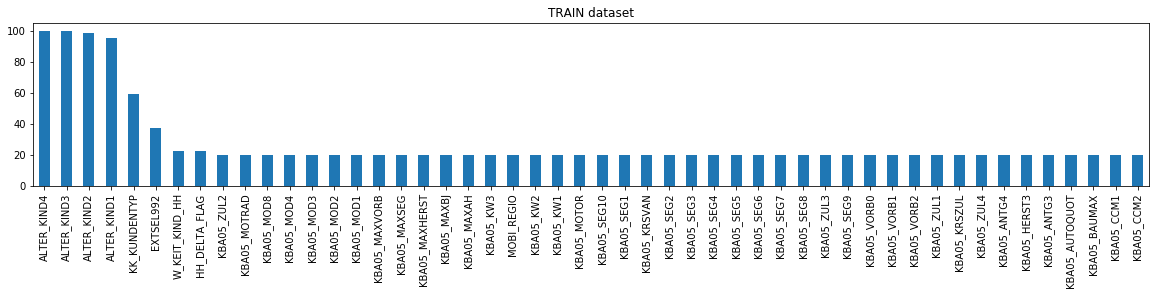

In [4]:
%%time
empty_cells_train = pd.isnull(train).sum()*100.0/train.shape[0]
empty_cells_train = empty_cells_train.sort_values(ascending=False)
empty_cells_train[:50].plot(figsize=(20,3),kind='bar',title='TRAIN dataset') # bar plot of first 50 most missing features

[]

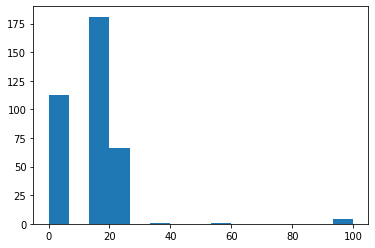

In [5]:
plt.hist(empty_cells_train,bins=15)
plt.plot()

CPU times: user 94.5 ms, sys: 201 µs, total: 94.7 ms
Wall time: 93.2 ms


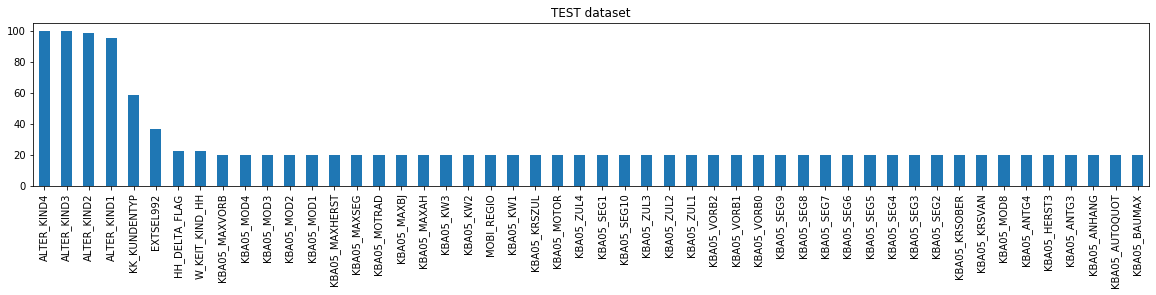

In [6]:
%%time
empty_cells_test = pd.isnull(test).sum()*100.0/test.shape[0]
empty_cells_test = empty_cells_test.sort_values(ascending=False)
empty_cells_test[:50].plot(figsize=(20,3),kind='bar',title='TEST dataset') # bar plot of first 50 most missing features

[]

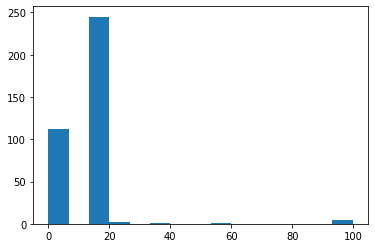

In [7]:
plt.hist(empty_cells_test,bins=15)
plt.plot()

In [8]:
missingness_threshold_percentage=30

In [9]:
print(np.sum(empty_cells_train>=missingness_threshold_percentage)
      ,np.sum(empty_cells_test>=missingness_threshold_percentage))

6 6


## 02.02. Undefined features

In [10]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"
train,missing_metadata_annotations_train,not_present_features_train = \
 unknown_to_nan(train, metadata_attributes , 'unknown|no transactions known') 

Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CAMEO_INTL_2015 feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 fe

In [11]:
print("{} TRAIN dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_train), len(not_present_features_train) ) )

94 TRAIN dataset features lacking metadata information, while there are 42 features not used by provided dataset. 


In [12]:
### metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"
test,missing_metadata_annotations_test,not_present_features_test = \
 unknown_to_nan(test, metadata_attributes , 'unknown|no transactions known') 

Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CAMEO_INTL_2015 feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 fe

In [13]:
print("{} TEST dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_test), len(not_present_features_test) ) )

93 TEST dataset features lacking metadata information, while there are 42 features not used by provided dataset. 


in "TRAIN" we have one additional column which lacks metadata information, but we know what is that column, it is a `RESPONSE` column,  that states whether or not a person became a customer of the company following the marketing campaign.

# 02.03. Missing features: correction

In [14]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"

train,missing_metadata_annotations_train,not_present_features_train = \
 unknown_to_nan(train, metadata_attributes , 'unknown|no transactions known', 
               rename_columns='azdias_corrected_features.tsv') 

Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJ

In [15]:

test,missing_metadata_annotations_test,not_present_features_test = \
 unknown_to_nan(test, metadata_attributes , 'unknown|no transactions known',
               rename_columns='azdias_corrected_features.tsv') 

Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTER_KIND1 feature is missing metadata annotation!
Warning! ALTER_KIND2 feature is missing metadata annotation!
Warning! ALTER_KIND3 feature is missing metadata annotation!
Warning! ALTER_KIND4 feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJ

In [16]:
print("{} TRAIN dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_train), len(not_present_features_train) ) )



56 TRAIN dataset features lacking metadata information, while there are 4 features not used by provided dataset. 


In [17]:
print("{} TEST dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_test), len(not_present_features_test) ) )

55 TEST dataset features lacking metadata information, while there are 4 features not used by provided dataset. 


## 02.04. Feature missingness filtering

In [18]:
%%time
empty_cells_train = pd.isnull(train).sum()*100.0/train.shape[0]
empty_cells_train = empty_cells_train.sort_values(ascending=False)

empty_cells_test = pd.isnull(test).sum()*100.0/test.shape[0]
empty_cells_test = empty_cells_test.sort_values(ascending=False)

CPU times: user 83.4 ms, sys: 0 ns, total: 83.4 ms
Wall time: 81.7 ms


In [19]:
%%time
features_to_drop_train =list( (empty_cells_train[empty_cells_train>missingness_threshold_percentage]).index.values)
train.drop(labels=features_to_drop_train,inplace=True,axis='columns')

print("Dropped {} TRAIN columns".format(len(features_to_drop_train)))

Dropped 31 TRAIN columns
CPU times: user 34.1 ms, sys: 182 µs, total: 34.3 ms
Wall time: 32.6 ms


CPU times: user 125 ms, sys: 0 ns, total: 125 ms
Wall time: 123 ms


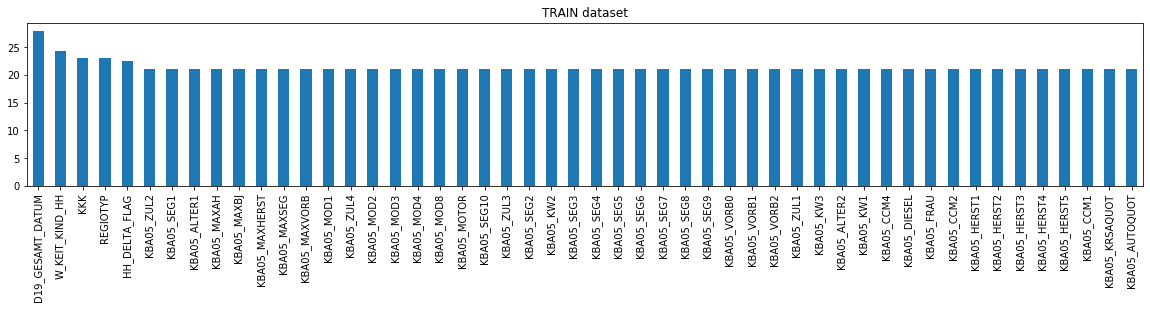

In [25]:
%%time
empty_cells_train = pd.isnull(train).sum()*100.0/train.shape[0]
empty_cells_train = empty_cells_train.sort_values(ascending=False)

empty_cells_train[:50].plot(figsize=(20,3),kind='bar',title='TRAIN dataset') # bar plot of first 50 most missing features

In [22]:
%%time
features_to_drop_test =list( (empty_cells_test[empty_cells_test>missingness_threshold_percentage]).index.values)
test.drop(labels=features_to_drop_test,inplace=True,axis='columns')

print("Dropped {} TEST columns".format(len(features_to_drop_test)))

Dropped 31 TEST columns
CPU times: user 18.6 ms, sys: 28.1 ms, total: 46.7 ms
Wall time: 45.3 ms


CPU times: user 97.6 ms, sys: 91 µs, total: 97.7 ms
Wall time: 96 ms


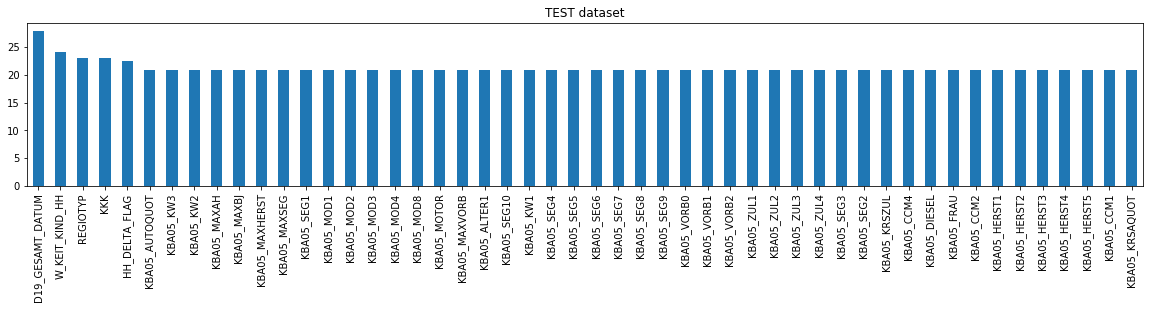

In [26]:
%%time
empty_cells_test = pd.isnull(test).sum()*100.0/test.shape[0]
empty_cells_test = empty_cells_test.sort_values(ascending=False)
empty_cells_test[:50].plot(figsize=(20,3),kind='bar',title='TEST dataset') # bar plot of first 50 most missing features

In [27]:
assert len(features_to_drop_test) == len(features_to_drop_train)

assert len(set(features_to_drop_test).intersection((set(features_to_drop_train)))) == len(features_to_drop_test)

We see that both for train and test we **removed 31 columns**, and these columns are THE SAME for both datasets

---
# 03. Missing rows

CPU times: user 85.4 ms, sys: 78 µs, total: 85.5 ms
Wall time: 84.1 ms


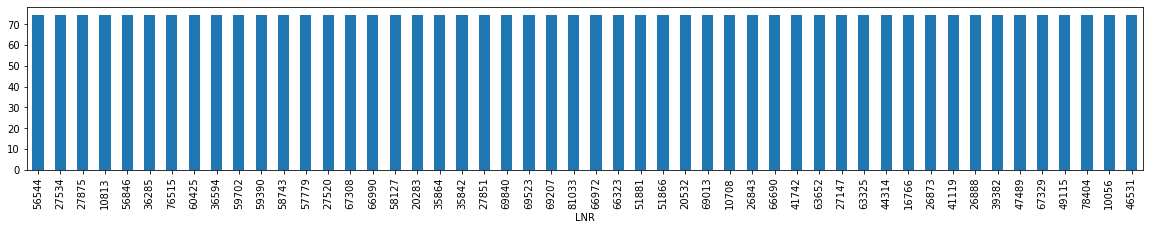

In [28]:
%%time
empty_rows_train = pd.isnull(train).sum(axis=1)*100.0/train.shape[1]
empty_rows_train = empty_rows_train.sort_values(ascending=False)
empty_rows_train[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing rows

CPU times: user 190 ms, sys: 57 µs, total: 190 ms
Wall time: 188 ms


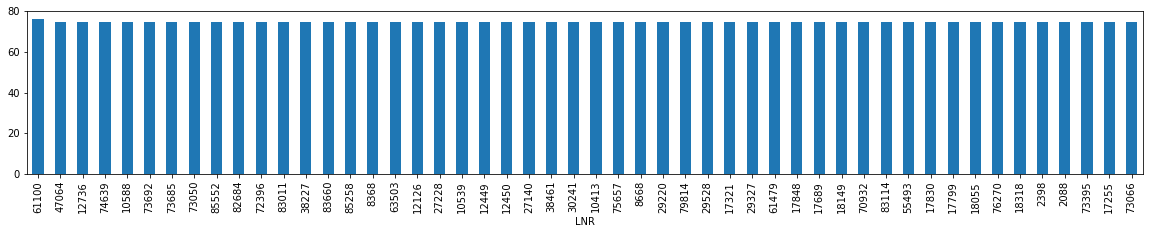

In [29]:
%%time
empty_rows_test = pd.isnull(test).sum(axis=1)*100.0/test.shape[1]
empty_rows_test = empty_rows_test.sort_values(ascending=False)
empty_rows_test[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing rows

In [30]:
row_missingness_threshold_percentage = 50

In [31]:
# How many percent of rows/entries/subjects were removed?
sum(empty_rows_train>row_missingness_threshold_percentage)*100/train.shape[0]

18.313858758903216

In [32]:
# How many percent of rows/entries/subjects were removed?
sum(empty_rows_test>row_missingness_threshold_percentage)*100/test.shape[0]

18.056171643359093

We see that we have approximately 18% of subjects in the dataset that have missingness above defined threshold of `50%`. I might re-visit this threshold later, depending on the overall score of the subsequent classifier.

[]

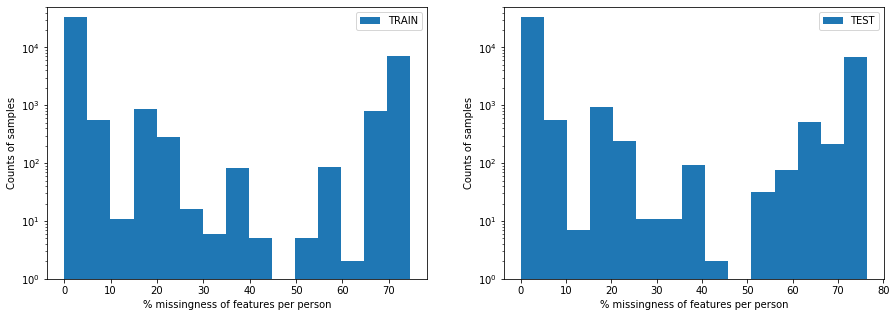

In [33]:
fig,axs = plt.subplots(1,2,figsize=(15,5))

axs[0].hist(empty_rows_train,bins=15,label="TRAIN",log=True)
axs[0].set_ylim(1e0,5e4)
axs[0].legend()
axs[0].set_xlabel("% missingness of features per person")
axs[0].set_ylabel("Counts of samples")

axs[1].hist(empty_rows_test,bins=15,label="TEST",log=True)
axs[1].set_ylim(1e0,5e4)
axs[1].legend()
axs[1].set_xlabel("% missingness of features per person")
axs[1].set_ylabel("Counts of samples")

plt.plot()

In [34]:
%%time
samples_to_drop_train =list( (empty_rows_train[empty_rows_train>row_missingness_threshold_percentage]).index.values)
train.drop(index=samples_to_drop_train,inplace=True,axis='index')

print("{} TRAIN samples dropped".format(len(samples_to_drop_train)))

7868 TRAIN samples dropped
CPU times: user 31.7 ms, sys: 20.1 ms, total: 51.8 ms
Wall time: 49.9 ms


In [35]:
%%time
samples_to_drop_test =list( (empty_rows_test[empty_rows_test>row_missingness_threshold_percentage]).index.values)
test.drop(index=samples_to_drop_test,inplace=True,axis='index')

print("{} TEST samples dropped".format(len(samples_to_drop_test)))

7734 TEST samples dropped
CPU times: user 33.9 ms, sys: 4.1 ms, total: 38 ms
Wall time: 35.5 ms


# 04. Data types and & feature encoding

I am going to apply the SAME logic as in the previous notebooks 01 and 02. Except here I have additional column only for TRAIN dataset `RESPONSE` that is assumed to be a binary variable, and is already encoded as 0/1 (see below)

In [37]:
metadata_attributes = r"../arvato_data/DIAS Attributes - Values 2017.xlsx"

train,missing_metadata_annotations_train,not_present_features_train = \
 unknown_to_nan(train, metadata_attributes , 'unknown|no transactions known', 
               rename_columns='azdias_corrected_features.tsv') 


test,missing_metadata_annotations_test,not_present_features_test = \
 unknown_to_nan(test, metadata_attributes , 'unknown|no transactions known',
               rename_columns='azdias_corrected_features.tsv') 

Renaming columns according to provided file: azdias_corrected_features.tsv
Found [-1 '-1, 0' 0 10 '-1, 9' '-1'] unique combination of values indicating/encoding missing entries 

Warning! AKT_DAT_KL feature is missing metadata annotation!
Warning! ALTERSKATEGORIE_FEIN feature is missing metadata annotation!
Warning! ANZ_KINDER feature is missing metadata annotation!
Warning! ANZ_STATISTISCHE_HAUSHALTE feature is missing metadata annotation!
Warning! ARBEIT feature is missing metadata annotation!
Warning! CJT_KATALOGNUTZER feature is missing metadata annotation!
Warning! CJT_TYP_1 feature is missing metadata annotation!
Warning! CJT_TYP_2 feature is missing metadata annotation!
Warning! CJT_TYP_3 feature is missing metadata annotation!
Warning! CJT_TYP_4 feature is missing metadata annotation!
Warning! CJT_TYP_5 feature is missing metadata annotation!
Warning! CJT_TYP_6 feature is missing metadata annotation!
Warning! D19_KONSUMTYP_MAX feature is missing metadata annotation!
Warning! D1

In [38]:
print("{} TRAIN dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_train), len(not_present_features_train) ) )

print("{} TEST dataset features lacking metadata information, while there are {} features not used by provided dataset. ".\
      format(  len(missing_metadata_annotations_test), len(not_present_features_test) ) )

51 TRAIN dataset features lacking metadata information, while there are 30 features not used by provided dataset. 
50 TEST dataset features lacking metadata information, while there are 30 features not used by provided dataset. 


In [41]:
missing_metadata_annotations_train.remove('RESPONSE')
'RESPONSE' in missing_metadata_annotations_train

False

In [42]:
missing_metadata_feature_info =  {}
missing_metadata_feature_info['Attribute'] = []
missing_metadata_feature_info['unique_counts'] = []
missing_metadata_feature_info['unique_vals'] = []

for f in missing_metadata_annotations_train:
    unique_vals =  np.unique(train[f].dropna() )
    
    missing_metadata_feature_info['Attribute'].append(f)
    
    missing_metadata_feature_info['unique_counts'].append(len(unique_vals))
    missing_metadata_feature_info['unique_vals'].append(unique_vals)   
    
missing_metadata_feature_info = pd.DataFrame.from_dict(missing_metadata_feature_info)
missing_metadata_feature_info.sort_values('unique_counts',ascending=False, inplace=True)


missing_metadata_feature_info_train = missing_metadata_feature_info
missing_metadata_feature_info_train

,Attribute,unique_counts,unique_vals
30,EINGEFUEGT_AM,1537,"[1991-08-30 00:00:00, 1992-02-10 00:00:00, 199..."
47,ANZ_STATISTISCHE_HAUSHALTE,173,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
9,VERDICHTUNGSRAUM,46,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
21,D19_LETZTER_KAUF_BRANCHE,35,"[D19_BANKEN_DIREKT, D19_BANKEN_GROSS, D19_BANK..."
2,EINGEZOGENAM_HH_JAHR,33,"[1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991...."
25,ALTERSKATEGORIE_FEIN,25,"[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
1,VK_DISTANZ,13,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
48,VK_ZG11,11,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
17,VK_DHT4A,11,"[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ..."
18,D19_VERSI_OFFLINE_DATUM,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"


In [43]:
missing_metadata_feature_info =  {}
missing_metadata_feature_info['Attribute'] = []
missing_metadata_feature_info['unique_counts'] = []
missing_metadata_feature_info['unique_vals'] = []

for f in missing_metadata_annotations_test:
    unique_vals =  np.unique(test[f].dropna() )
    
    missing_metadata_feature_info['Attribute'].append(f)
    
    missing_metadata_feature_info['unique_counts'].append(len(unique_vals))
    missing_metadata_feature_info['unique_vals'].append(unique_vals)   
    
missing_metadata_feature_info = pd.DataFrame.from_dict(missing_metadata_feature_info)
missing_metadata_feature_info.sort_values('unique_counts',ascending=False, inplace=True)


missing_metadata_feature_info_test = missing_metadata_feature_info
missing_metadata_feature_info_test.head()

,Attribute,unique_counts,unique_vals
30,EINGEFUEGT_AM,1540,"[1992-02-10 00:00:00, 1992-02-12 00:00:00, 199..."
47,ANZ_STATISTISCHE_HAUSHALTE,173,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
9,VERDICHTUNGSRAUM,46,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ..."
21,D19_LETZTER_KAUF_BRANCHE,35,"[D19_BANKEN_DIREKT, D19_BANKEN_GROSS, D19_BANK..."
2,EINGEZOGENAM_HH_JAHR,32,"[1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992...."


As with `AZDIAS` and `Customers` dataset, as here we need to remove `EINGEFUEGT_AM` column, and encode `ANZ_STATISTISCHE_HAUSHALTE` as numerical and the remaining features to be encoded as categorical.

In [44]:
missing_metadata_feature_info_train['Type']= 'categorical' # categorical as default

##### dropping EINGEFUEGT_AM_idx 

### from `missing_metadata_feature_info`
EINGEFUEGT_AM_idx = missing_metadata_feature_info_train.loc[missing_metadata_feature_info_train['Attribute']=='EINGEFUEGT_AM'].index.values
missing_metadata_feature_info_train.drop(axis='index', inplace=True, index = EINGEFUEGT_AM_idx )


missing_metadata_feature_info_train.loc[missing_metadata_feature_info_train.Attribute=='ANZ_STATISTISCHE_HAUSHALTE', 'Type'] = 'numerical'

### from AZDIAS
try:
    train.drop(columns='EINGEFUEGT_AM',inplace=True)
except KeyError:
    print("EINGEFUEGT_AM already deleted from train")

    
missing_metadata_feature_info_train.head()

,Attribute,unique_counts,unique_vals,Type
47,ANZ_STATISTISCHE_HAUSHALTE,173,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",numerical
9,VERDICHTUNGSRAUM,46,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",categorical
21,D19_LETZTER_KAUF_BRANCHE,35,"[D19_BANKEN_DIREKT, D19_BANKEN_GROSS, D19_BANK...",categorical
2,EINGEZOGENAM_HH_JAHR,33,"[1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991....",categorical
25,ALTERSKATEGORIE_FEIN,25,"[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",categorical


In [45]:
missing_metadata_feature_info_test['Type']= 'categorical' # categorical as default

##### dropping EINGEFUEGT_AM_idx 

### from `missing_metadata_feature_info`
EINGEFUEGT_AM_idx = missing_metadata_feature_info_test.loc[missing_metadata_feature_info_test['Attribute']=='EINGEFUEGT_AM'].index.values
missing_metadata_feature_info_test.drop(axis='index', inplace=True, index = EINGEFUEGT_AM_idx )


missing_metadata_feature_info_train.loc[missing_metadata_feature_info_test.Attribute=='ANZ_STATISTISCHE_HAUSHALTE', 'Type'] = 'numerical'

### from AZDIAS
try:
    test.drop(columns='EINGEFUEGT_AM',inplace=True)
except KeyError:
    print("EINGEFUEGT_AM already deleted from test")

    
missing_metadata_feature_info_train.head()

,Attribute,unique_counts,unique_vals,Type
47,ANZ_STATISTISCHE_HAUSHALTE,173,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",numerical
9,VERDICHTUNGSRAUM,46,"[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...",categorical
21,D19_LETZTER_KAUF_BRANCHE,35,"[D19_BANKEN_DIREKT, D19_BANKEN_GROSS, D19_BANK...",categorical
2,EINGEZOGENAM_HH_JAHR,33,"[1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991....",categorical
25,ALTERSKATEGORIE_FEIN,25,"[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...",categorical


,Attribute,Type
KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_GROSSRAUMVANS,ordinal
KBA13_BJ_2009,KBA13_BJ_2009,ordinal
KBA05_SEG4,KBA05_SEG4,ordinal
GREEN_AVANTGARDE,GREEN_AVANTGARDE,categorical
SEMIO_FAM,SEMIO_FAM,ordinal
...,...,...
CJT_TYP_3,CJT_TYP_3,categorical
KBA05_FRAU,KBA05_FRAU,ordinal
CJT_TYP_2,CJT_TYP_2,categorical
D19_KINDERARTIKEL_RZ,D19_KINDERARTIKEL_RZ,ordinal


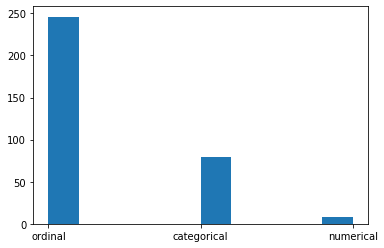

In [46]:
missing_metadata_feature_info_train = missing_metadata_feature_info_train[['Attribute','Type']]

all_feature_types = pd.read_csv('metadata_feature_types.tsv',sep="\t").dropna()
all_feature_types = pd.concat([all_feature_types,missing_metadata_feature_info_train])

# must be in Azdias
all_feature_types.index = all_feature_types['Attribute']
# features that have filtered AZDIAS entry
all_feature_types = all_feature_types.loc[ set(all_feature_types['Attribute'] ).intersection( (set(train.columns  )))  ]

plt.hist(all_feature_types['Type'])

all_feature_types_train = all_feature_types
all_feature_types_train = all_feature_types_train.append( pd.DataFrame( {"Attribute":['RESPONSE'], 'Type':'categorical'} )   )
all_feature_types_train

,Attribute,Type
Attribute,,
KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_GROSSRAUMVANS,ordinal
KBA13_BJ_2009,KBA13_BJ_2009,ordinal
KBA05_SEG4,KBA05_SEG4,ordinal
GREEN_AVANTGARDE,GREEN_AVANTGARDE,categorical
SEMIO_FAM,SEMIO_FAM,ordinal
...,...,...
D19_BANKEN_REST_RZ,D19_BANKEN_REST_RZ,ordinal
CJT_TYP_3,CJT_TYP_3,categorical
KBA05_FRAU,KBA05_FRAU,ordinal


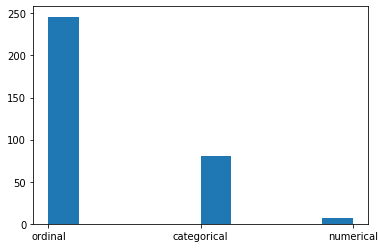

In [48]:
missing_metadata_feature_info_test = missing_metadata_feature_info_test[['Attribute','Type']]

all_feature_types = pd.read_csv('metadata_feature_types.tsv',sep="\t").dropna()
all_feature_types = pd.concat([all_feature_types,missing_metadata_feature_info_test])

# must be in dataset
all_feature_types.index = all_feature_types['Attribute']
# features that have filtered AZDIAS entry
all_feature_types = all_feature_types.loc[ set(all_feature_types['Attribute'] ).intersection( (set(test.columns  )))  ]

plt.hist(all_feature_types['Type'])

all_feature_types_test = all_feature_types
all_feature_types_test

# Imputing missing features.

# TODO [remove]

- add general population for imputing!

## a. concatenating train/test
Our data still has lots of missing entries. Analogically to a notebook in `Unsupervised/Unsupervised_Customer_Segmentation.ipynb` I am going to use a IterativeImputer in an attempt to 

In [49]:
train['dataset']='train'
test['dataset']='test'

In [50]:
joint_dataset = pd.concat([train,test])

In [51]:
train.to_csv("../arvato_data_processed/train.csv") 
all_feature_types_train.to_csv("../arvato_data_processed/train_feature_types.csv") 

In [52]:
test.to_csv("../arvato_data_processed/test.csv") 
all_feature_types_test.to_csv("../arvato_data_processed/test_feature_types.csv") 

**NOTE**: below I am copying some code from `EDA/03_Concatenate_and_Impute.ipynb`

It is basically a boilerplate to replace values for categories that in fact code for the same thing

## b. standardizing selected features

In [53]:

print("Before standarization we have classes: {}".format(np.unique(joint_dataset['LP_FAMILIE_GROB'].dropna())))


joint_dataset['LP_FAMILIE_GROB'].replace(4,3,inplace=True)
joint_dataset['LP_FAMILIE_GROB'].replace(5,3,inplace=True)

joint_dataset['LP_FAMILIE_GROB'].replace(7,6,inplace=True)
joint_dataset['LP_FAMILIE_GROB'].replace(8,6,inplace=True)

joint_dataset['LP_FAMILIE_GROB'].replace(10,9,inplace=True)
joint_dataset['LP_FAMILIE_GROB'].replace(11,9,inplace=True)

joint_dataset['LP_FAMILIE_GROB'].replace(0,np.nan,inplace=True)


print("After standarization we have classes: {}".format(np.unique(joint_dataset['LP_FAMILIE_GROB'].dropna())))


Before standarization we have classes: [0. 1. 2. 3. 4. 5.]
After standarization we have classes: [1. 2. 3.]


In [54]:
print("Before standarization we have classes: {}".format(np.unique(joint_dataset['LP_STATUS_GROB'].dropna())))

joint_dataset['LP_STATUS_GROB'].replace(2,1,inplace=True)

joint_dataset['LP_STATUS_GROB'].replace(4,3,inplace=True)
joint_dataset['LP_STATUS_GROB'].replace(5,3,inplace=True)

joint_dataset['LP_STATUS_GROB'].replace(7,6,inplace=True)

joint_dataset['LP_STATUS_GROB'].replace(9,8,inplace=True)

print("After standarization we have classes: {}".format(np.unique(joint_dataset['LP_STATUS_GROB'].dropna())))


Before standarization we have classes: [1. 2. 3. 4. 5.]
After standarization we have classes: [1. 3.]


In [55]:
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM']= joint_dataset['PRAEGENDE_JUGENDJAHRE']

print("Before standarization we have classes: {}".format(np.unique(joint_dataset['PRAEGENDE_JUGENDJAHRE'].dropna())))

joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(2,1,inplace=True)

joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(4,3,inplace=True)

joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(6,5,inplace=True)
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(7,5,inplace=True)
 
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(9,8,inplace=True)


joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(11,10,inplace=True)
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(12,10,inplace=True)
joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(13,10,inplace=True)


joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].replace(15,14,inplace=True)

print("After standarization we have classes: {}".format(np.unique(joint_dataset['PRAEGENDE_JUGENDJAHRE_SIM'].dropna())))


Before standarization we have classes: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]
After standarization we have classes: [ 1.  3.  5.  8. 10. 14.]


In [56]:
joint_dataset['CAMEO_DEUINTL_2015_SIM'] = joint_dataset['CAMEO_DEUINTL_2015']

 
    
print("Before standarization we have classes: {}".format(np.unique(joint_dataset['CAMEO_DEUINTL_2015_SIM'].dropna())))

joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('12','11',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('13','11',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('14','11',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('15','11',inplace=True)
 
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('22','21',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('23','21',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('24','21',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('25','21',inplace=True)
 
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('32','31',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('33','31',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('34','31',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('35','31',inplace=True)

joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('42','41',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('43','41',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('44','41',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('45','41',inplace=True)

joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('52','51',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('53','51',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('54','51',inplace=True)
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('55','51',inplace=True)
    
joint_dataset['CAMEO_DEUINTL_2015_SIM'].replace('XX',np.nan,inplace=True)    
    
print("After standarization we have classes: {}".format(np.unique(joint_dataset['CAMEO_DEUINTL_2015_SIM'].dropna())))


Before standarization we have classes: ['12' '13' '14' '15' '22' '23' '24' '25' '31' '32' '33' '34' '35' '41'
 '43' '44' '45' '51' '52' '54' '55' 'XX']
After standarization we have classes: ['11' '21' '31' '41' '51']


In [57]:
all_feature_types_train

,Attribute,Type
KBA13_SEG_GROSSRAUMVANS,KBA13_SEG_GROSSRAUMVANS,ordinal
KBA13_BJ_2009,KBA13_BJ_2009,ordinal
KBA05_SEG4,KBA05_SEG4,ordinal
GREEN_AVANTGARDE,GREEN_AVANTGARDE,categorical
SEMIO_FAM,SEMIO_FAM,ordinal
...,...,...
CJT_TYP_3,CJT_TYP_3,categorical
KBA05_FRAU,KBA05_FRAU,ordinal
CJT_TYP_2,CJT_TYP_2,categorical
D19_KINDERARTIKEL_RZ,D19_KINDERARTIKEL_RZ,ordinal


## c. encoding categorical values

In [58]:
categorical_features = list(all_feature_types_train[all_feature_types_train['Type']=='categorical']['Attribute'])

categorical_features.append('dataset')
len(categorical_features)

81

68


(array([58., 10.,  7.,  0.,  0.,  1.,  0.,  2.,  1.,  2.]),
 array([ 2. ,  6.4, 10.8, 15.2, 19.6, 24. , 28.4, 32.8, 37.2, 41.6, 46. ]),
 <a list of 10 Patch objects>)

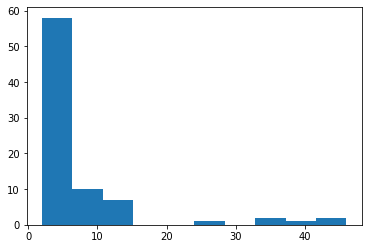

In [59]:
categorical_features_count = {'feature': [], 'counts':[]}

for f in categorical_features:

    categorical_features_count['feature'].append(f)
    
    categorical_features_count['counts'].append(len(np.unique(joint_dataset[f].dropna())  ) )


categorical_features_count = pd.DataFrame(categorical_features_count)

categorical_features_to_one_hot = list( categorical_features_count[categorical_features_count['counts']>2]['feature'])
print(len(categorical_features_to_one_hot))

plt.hist(categorical_features_count['counts'])

In [60]:
print(joint_dataset.shape)
joint_dataset = pd.get_dummies(joint_dataset,columns=categorical_features_to_one_hot)
print(joint_dataset.shape)

(70193, 337)
(70193, 888)


## d. encode ordinal features

In [61]:
numerical_features = list(all_feature_types_train[all_feature_types_train['Type']=='numerical']['Attribute'])
not_numerical_features  = [f for f in joint_dataset.columns if f not in numerical_features]


In [62]:
from sklearn.preprocessing import LabelEncoder
LabelEncoders = { x: LabelEncoder() for x in not_numerical_features  }

for idx,feature in enumerate(not_numerical_features):
    print("{}/{}: {}".format(idx+1,len(not_numerical_features),feature ))
    
    # NA mask - label encoder cannot handle missing values (i.e. NAs)
    not_na_mask =  joint_dataset[feature].notnull() # FALSE for NA, TRUE for some value
    
    joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )

1/880: BALLRAUM
2/880: CAMEO_DEUG_2015
3/880: CAMEO_DEUINTL_2015
4/880: D19_BANKEN_DIREKT_RZ
5/880: D19_BANKEN_GROSS_RZ
6/880: D19_BANKEN_LOKAL_RZ
7/880: D19_BANKEN_ONLINE_QUOTE_12
8/880: D19_BANKEN_REST_RZ
9/880: D19_BEKLEIDUNG_GEH_RZ
10/880: D19_BEKLEIDUNG_REST_RZ
11/880: D19_BILDUNG_RZ
12/880: D19_BIO_OEKO_RZ
13/880: D19_BUCH_RZ
14/880: D19_DIGIT_SERV_RZ
15/880: D19_DROGERIEARTIKEL_RZ
16/880: D19_ENERGIE_RZ
17/880: D19_FREIZEIT_RZ
18/880: D19_GARTEN_RZ
19/880: D19_GESAMT_DATUM
20/880: D19_GESAMT_ONLINE_QUOTE_12


<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )


21/880: D19_HANDWERK_RZ
22/880: D19_HAUS_DEKO_RZ
23/880: D19_KINDERARTIKEL_RZ
24/880: D19_KOSMETIK_RZ
25/880: D19_LEBENSMITTEL_RZ
26/880: D19_LOTTO_RZ
27/880: D19_NAHRUNGSERGAENZUNG_RZ
28/880: D19_RATGEBER_RZ
29/880: D19_REISEN_RZ
30/880: D19_SAMMELARTIKEL_RZ
31/880: D19_SCHUHE_RZ
32/880: D19_SONSTIGE_RZ
33/880: D19_TECHNIK_RZ
34/880: D19_TELKO_MOBILE_RZ
35/880: D19_TELKO_REST_RZ
36/880: D19_TIERARTIKEL_RZ
37/880: D19_VERSAND_ONLINE_QUOTE_12
38/880: D19_VERSAND_REST_RZ
39/880: D19_VERSICHERUNGEN_RZ
40/880: D19_VOLLSORTIMENT_RZ
41/880: D19_WEIN_FEINKOST_RZ
42/880: DSL_FLAG
43/880: EWDICHTE
44/880: FINANZ_ANLEGER
45/880: FINANZ_HAUSBAUER
46/880: FINANZ_MINIMALIST
47/880: FINANZ_SPARER
48/880: FINANZ_UNAUFFAELLIGER
49/880: FINANZ_VORSORGER
50/880: GREEN_AVANTGARDE
51/880: HH_DELTA_FLAG
52/880: HH_EINKOMMEN_SCORE
53/880: INNENSTADT
54/880: KBA05_ALTER1
55/880: KBA05_ALTER2
56/880: KBA05_ALTER3
57/880: KBA05_ALTER4
58/880: KBA05_ANHANG
59/880: KBA05_ANTG1
60/880: KBA05_ANTG2
61/880: KBA05_A

<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

295/880: CAMEO_DEU_2015_1E
296/880: CAMEO_DEU_2015_2A
297/880: CAMEO_DEU_2015_2B
298/880: CAMEO_DEU_2015_2C
299/880: CAMEO_DEU_2015_2D
300/880: CAMEO_DEU_2015_3A
301/880: CAMEO_DEU_2015_3B
302/880: CAMEO_DEU_2015_3C
303/880: CAMEO_DEU_2015_3D
304/880: CAMEO_DEU_2015_4A
305/880: CAMEO_DEU_2015_4B
306/880: CAMEO_DEU_2015_4C
307/880: CAMEO_DEU_2015_4D
308/880: CAMEO_DEU_2015_4E
309/880: CAMEO_DEU_2015_5A
310/880: CAMEO_DEU_2015_5B
311/880: CAMEO_DEU_2015_5C
312/880: CAMEO_DEU_2015_5D
313/880: CAMEO_DEU_2015_5E
314/880: CAMEO_DEU_2015_5F
315/880: CAMEO_DEU_2015_6A
316/880: CAMEO_DEU_2015_6B
317/880: CAMEO_DEU_2015_6C
318/880: CAMEO_DEU_2015_6D
319/880: CAMEO_DEU_2015_6E
320/880: CAMEO_DEU_2015_6F
321/880: CAMEO_DEU_2015_7A
322/880: CAMEO_DEU_2015_7B
323/880: CAMEO_DEU_2015_7C
324/880: CAMEO_DEU_2015_7D
325/880: CAMEO_DEU_2015_7E
326/880: CAMEO_DEU_2015_8A
327/880: CAMEO_DEU_2015_8B
328/880: CAMEO_DEU_2015_8C
329/880: CAMEO_DEU_2015_8D
330/880: CAMEO_DEU_2015_9A
331/880: CAMEO_DEU_2015_9B
3

<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

351/880: D19_VERSI_OFFLINE_DATUM_6
352/880: D19_VERSI_OFFLINE_DATUM_7
353/880: D19_VERSI_OFFLINE_DATUM_8
354/880: D19_VERSI_OFFLINE_DATUM_9
355/880: D19_VERSI_OFFLINE_DATUM_10
356/880: UMFELD_ALT_1.0
357/880: UMFELD_ALT_2.0
358/880: UMFELD_ALT_3.0
359/880: UMFELD_ALT_4.0
360/880: UMFELD_ALT_5.0
361/880: KBA13_BAUMAX_1.0
362/880: KBA13_BAUMAX_2.0
363/880: KBA13_BAUMAX_3.0
364/880: KBA13_BAUMAX_4.0
365/880: KBA13_BAUMAX_5.0
366/880: KBA05_MODTEMP_1.0
367/880: KBA05_MODTEMP_2.0
368/880: KBA05_MODTEMP_3.0
369/880: KBA05_MODTEMP_4.0
370/880: KBA05_MODTEMP_5.0
371/880: KBA05_MODTEMP_6.0
372/880: D19_KONSUMTYP_MAX_1
373/880: D19_KONSUMTYP_MAX_2
374/880: D19_KONSUMTYP_MAX_3
375/880: D19_KONSUMTYP_MAX_4
376/880: D19_KONSUMTYP_MAX_8
377/880: D19_KONSUMTYP_MAX_9
378/880: CJT_KATALOGNUTZER_1.0
379/880: CJT_KATALOGNUTZER_2.0
380/880: CJT_KATALOGNUTZER_3.0
381/880: CJT_KATALOGNUTZER_4.0
382/880: CJT_KATALOGNUTZER_5.0
383/880: REGIOTYP_1.0
384/880: REGIOTYP_2.0
385/880: REGIOTYP_3.0
386/880: REGIOTYP

<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

415/880: FIRMENDICHTE_1.0
416/880: FIRMENDICHTE_2.0
417/880: FIRMENDICHTE_3.0
418/880: FIRMENDICHTE_4.0
419/880: FIRMENDICHTE_5.0
420/880: KBA13_GBZ_1.0
421/880: KBA13_GBZ_2.0
422/880: KBA13_GBZ_3.0
423/880: KBA13_GBZ_4.0
424/880: KBA13_GBZ_5.0
425/880: KBA05_HERSTTEMP_1.0
426/880: KBA05_HERSTTEMP_2.0
427/880: KBA05_HERSTTEMP_3.0
428/880: KBA05_HERSTTEMP_4.0
429/880: KBA05_HERSTTEMP_5.0
430/880: KBA13_HHZ_1.0
431/880: KBA13_HHZ_2.0
432/880: KBA13_HHZ_3.0
433/880: KBA13_HHZ_4.0
434/880: KBA13_HHZ_5.0
435/880: VK_DHT4A_1.0
436/880: VK_DHT4A_2.0
437/880: VK_DHT4A_3.0
438/880: VK_DHT4A_4.0
439/880: VK_DHT4A_5.0
440/880: VK_DHT4A_6.0
441/880: VK_DHT4A_7.0
442/880: VK_DHT4A_8.0
443/880: VK_DHT4A_9.0
444/880: VK_DHT4A_10.0
445/880: VK_DHT4A_11.0
446/880: GEMEINDETYP_11.0
447/880: GEMEINDETYP_12.0
448/880: GEMEINDETYP_21.0
449/880: GEMEINDETYP_22.0
450/880: GEMEINDETYP_30.0
451/880: GEMEINDETYP_40.0
452/880: GEMEINDETYP_50.0
453/880: MOBI_RASTER_1.0
454/880: MOBI_RASTER_2.0
455/880: MOBI_RASTE

<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

478/880: KBA05_MAXHERST_2.0
479/880: KBA05_MAXHERST_3.0
480/880: KBA05_MAXHERST_4.0
481/880: KBA05_MAXHERST_5.0
482/880: KBA13_ANTG4_0.0
483/880: KBA13_ANTG4_1.0
484/880: KBA13_ANTG4_2.0
485/880: LP_LEBENSPHASE_GROB_0.0
486/880: LP_LEBENSPHASE_GROB_1.0
487/880: LP_LEBENSPHASE_GROB_2.0
488/880: LP_LEBENSPHASE_GROB_3.0
489/880: LP_LEBENSPHASE_GROB_4.0
490/880: LP_LEBENSPHASE_GROB_5.0
491/880: LP_LEBENSPHASE_GROB_6.0
492/880: LP_LEBENSPHASE_GROB_7.0
493/880: LP_LEBENSPHASE_GROB_8.0
494/880: LP_LEBENSPHASE_GROB_9.0
495/880: LP_LEBENSPHASE_GROB_10.0
496/880: LP_LEBENSPHASE_GROB_11.0
497/880: LP_LEBENSPHASE_GROB_12.0
498/880: GFK_URLAUBERTYP_1.0
499/880: GFK_URLAUBERTYP_2.0
500/880: GFK_URLAUBERTYP_3.0
501/880: GFK_URLAUBERTYP_4.0
502/880: GFK_URLAUBERTYP_5.0
503/880: GFK_URLAUBERTYP_6.0
504/880: GFK_URLAUBERTYP_7.0
505/880: GFK_URLAUBERTYP_8.0
506/880: GFK_URLAUBERTYP_9.0
507/880: GFK_URLAUBERTYP_10.0
508/880: GFK_URLAUBERTYP_11.0
509/880: GFK_URLAUBERTYP_12.0
510/880: VK_DISTANZ_1.0
511/88

<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

542/880: KBA13_ANTG1_3.0
543/880: KBA13_ANTG1_4.0
544/880: KBA13_KMH_210_1.0
545/880: KBA13_KMH_210_2.0
546/880: KBA13_KMH_210_3.0
547/880: KBA13_KMH_210_4.0
548/880: KBA13_KMH_210_5.0
549/880: CJT_TYP_4_1.0
550/880: CJT_TYP_4_2.0
551/880: CJT_TYP_4_3.0
552/880: CJT_TYP_4_4.0
553/880: CJT_TYP_4_5.0
554/880: HEALTH_TYP_1.0
555/880: HEALTH_TYP_2.0
556/880: HEALTH_TYP_3.0
557/880: SHOPPER_TYP_0.0
558/880: SHOPPER_TYP_1.0
559/880: SHOPPER_TYP_2.0
560/880: SHOPPER_TYP_3.0
561/880: PRAEGENDE_JUGENDJAHRE_1.0
562/880: PRAEGENDE_JUGENDJAHRE_2.0
563/880: PRAEGENDE_JUGENDJAHRE_3.0
564/880: PRAEGENDE_JUGENDJAHRE_4.0
565/880: PRAEGENDE_JUGENDJAHRE_5.0
566/880: PRAEGENDE_JUGENDJAHRE_6.0
567/880: PRAEGENDE_JUGENDJAHRE_7.0
568/880: PRAEGENDE_JUGENDJAHRE_8.0
569/880: PRAEGENDE_JUGENDJAHRE_9.0
570/880: PRAEGENDE_JUGENDJAHRE_10.0
571/880: PRAEGENDE_JUGENDJAHRE_11.0
572/880: PRAEGENDE_JUGENDJAHRE_12.0
573/880: PRAEGENDE_JUGENDJAHRE_13.0
574/880: PRAEGENDE_JUGENDJAHRE_14.0
575/880: PRAEGENDE_JUGENDJAHRE_15

<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

606/880: EINGEZOGENAM_HH_JAHR_1997.0
607/880: EINGEZOGENAM_HH_JAHR_1998.0
608/880: EINGEZOGENAM_HH_JAHR_1999.0
609/880: EINGEZOGENAM_HH_JAHR_2000.0
610/880: EINGEZOGENAM_HH_JAHR_2001.0
611/880: EINGEZOGENAM_HH_JAHR_2002.0
612/880: EINGEZOGENAM_HH_JAHR_2003.0
613/880: EINGEZOGENAM_HH_JAHR_2004.0
614/880: EINGEZOGENAM_HH_JAHR_2005.0
615/880: EINGEZOGENAM_HH_JAHR_2006.0
616/880: EINGEZOGENAM_HH_JAHR_2007.0
617/880: EINGEZOGENAM_HH_JAHR_2008.0
618/880: EINGEZOGENAM_HH_JAHR_2009.0
619/880: EINGEZOGENAM_HH_JAHR_2010.0
620/880: EINGEZOGENAM_HH_JAHR_2011.0
621/880: EINGEZOGENAM_HH_JAHR_2012.0
622/880: EINGEZOGENAM_HH_JAHR_2013.0
623/880: EINGEZOGENAM_HH_JAHR_2014.0
624/880: EINGEZOGENAM_HH_JAHR_2015.0
625/880: EINGEZOGENAM_HH_JAHR_2016.0
626/880: EINGEZOGENAM_HH_JAHR_2017.0
627/880: EINGEZOGENAM_HH_JAHR_2018.0
628/880: FINANZTYP_1
629/880: FINANZTYP_2
630/880: FINANZTYP_3
631/880: FINANZTYP_4
632/880: FINANZTYP_5
633/880: FINANZTYP_6
634/880: ZABEOTYP_1
635/880: ZABEOTYP_2
636/880: ZABEOTYP_3


<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

665/880: VERDICHTUNGSRAUM_12.0
666/880: VERDICHTUNGSRAUM_13.0
667/880: VERDICHTUNGSRAUM_14.0
668/880: VERDICHTUNGSRAUM_15.0
669/880: VERDICHTUNGSRAUM_16.0
670/880: VERDICHTUNGSRAUM_17.0
671/880: VERDICHTUNGSRAUM_18.0
672/880: VERDICHTUNGSRAUM_19.0
673/880: VERDICHTUNGSRAUM_20.0
674/880: VERDICHTUNGSRAUM_21.0
675/880: VERDICHTUNGSRAUM_22.0
676/880: VERDICHTUNGSRAUM_23.0
677/880: VERDICHTUNGSRAUM_24.0
678/880: VERDICHTUNGSRAUM_25.0
679/880: VERDICHTUNGSRAUM_26.0
680/880: VERDICHTUNGSRAUM_27.0
681/880: VERDICHTUNGSRAUM_28.0
682/880: VERDICHTUNGSRAUM_29.0
683/880: VERDICHTUNGSRAUM_30.0
684/880: VERDICHTUNGSRAUM_31.0
685/880: VERDICHTUNGSRAUM_32.0
686/880: VERDICHTUNGSRAUM_33.0
687/880: VERDICHTUNGSRAUM_34.0
688/880: VERDICHTUNGSRAUM_35.0
689/880: VERDICHTUNGSRAUM_36.0
690/880: VERDICHTUNGSRAUM_37.0
691/880: VERDICHTUNGSRAUM_38.0
692/880: VERDICHTUNGSRAUM_39.0
693/880: VERDICHTUNGSRAUM_40.0
694/880: VERDICHTUNGSRAUM_41.0
695/880: VERDICHTUNGSRAUM_42.0
696/880: VERDICHTUNGSRAUM_43.0
697/880:

<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

726/880: D19_VERSI_ONLINE_DATUM_5
727/880: D19_VERSI_ONLINE_DATUM_6
728/880: D19_VERSI_ONLINE_DATUM_7
729/880: D19_VERSI_ONLINE_DATUM_8
730/880: D19_VERSI_ONLINE_DATUM_9
731/880: D19_VERSI_ONLINE_DATUM_10
732/880: ANZ_KINDER_0.0
733/880: ANZ_KINDER_1.0
734/880: ANZ_KINDER_2.0
735/880: ANZ_KINDER_3.0
736/880: ANZ_KINDER_4.0
737/880: ANZ_KINDER_5.0
738/880: ANZ_KINDER_6.0
739/880: ANZ_KINDER_7.0
740/880: LP_LEBENSPHASE_FEIN_0.0
741/880: LP_LEBENSPHASE_FEIN_1.0
742/880: LP_LEBENSPHASE_FEIN_2.0
743/880: LP_LEBENSPHASE_FEIN_3.0
744/880: LP_LEBENSPHASE_FEIN_4.0
745/880: LP_LEBENSPHASE_FEIN_5.0
746/880: LP_LEBENSPHASE_FEIN_6.0
747/880: LP_LEBENSPHASE_FEIN_7.0
748/880: LP_LEBENSPHASE_FEIN_8.0
749/880: LP_LEBENSPHASE_FEIN_9.0
750/880: LP_LEBENSPHASE_FEIN_10.0
751/880: LP_LEBENSPHASE_FEIN_11.0
752/880: LP_LEBENSPHASE_FEIN_12.0
753/880: LP_LEBENSPHASE_FEIN_13.0
754/880: LP_LEBENSPHASE_FEIN_14.0
755/880: LP_LEBENSPHASE_FEIN_15.0
756/880: LP_LEBENSPHASE_FEIN_16.0
757/880: LP_LEBENSPHASE_FEIN_17.0
7

<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

784/880: D19_VERSI_ONLINE_QUOTE_12_10.0
785/880: RT_KEIN_ANREIZ_1.0
786/880: RT_KEIN_ANREIZ_2.0
787/880: RT_KEIN_ANREIZ_3.0
788/880: RT_KEIN_ANREIZ_4.0
789/880: RT_KEIN_ANREIZ_5.0
790/880: CJT_TYP_1_1.0
791/880: CJT_TYP_1_2.0
792/880: CJT_TYP_1_3.0
793/880: CJT_TYP_1_4.0
794/880: CJT_TYP_1_5.0
795/880: D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_DIREKT
796/880: D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_GROSS
797/880: D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_LOKAL
798/880: D19_LETZTER_KAUF_BRANCHE_D19_BANKEN_REST
799/880: D19_LETZTER_KAUF_BRANCHE_D19_BEKLEIDUNG_GEH
800/880: D19_LETZTER_KAUF_BRANCHE_D19_BEKLEIDUNG_REST
801/880: D19_LETZTER_KAUF_BRANCHE_D19_BILDUNG
802/880: D19_LETZTER_KAUF_BRANCHE_D19_BIO_OEKO
803/880: D19_LETZTER_KAUF_BRANCHE_D19_BUCH_CD
804/880: D19_LETZTER_KAUF_BRANCHE_D19_DIGIT_SERV
805/880: D19_LETZTER_KAUF_BRANCHE_D19_DROGERIEARTIKEL
806/880: D19_LETZTER_KAUF_BRANCHE_D19_ENERGIE
807/880: D19_LETZTER_KAUF_BRANCHE_D19_FREIZEIT
808/880: D19_LETZTER_KAUF_BRANCHE_D19_GARTEN
809/880: D19_L

<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

838/880: ALTERSKATEGORIE_GROB_3
839/880: ALTERSKATEGORIE_GROB_4
840/880: ALTERSKATEGORIE_GROB_9
841/880: GEBAEUDETYP_RASTER_1.0
842/880: GEBAEUDETYP_RASTER_2.0
843/880: GEBAEUDETYP_RASTER_3.0
844/880: GEBAEUDETYP_RASTER_4.0
845/880: GEBAEUDETYP_RASTER_5.0
846/880: D19_TELKO_ONLINE_QUOTE_12_0.0
847/880: D19_TELKO_ONLINE_QUOTE_12_5.0
848/880: D19_TELKO_ONLINE_QUOTE_12_10.0
849/880: D19_KONSUMTYP_1.0
850/880: D19_KONSUMTYP_2.0
851/880: D19_KONSUMTYP_3.0
852/880: D19_KONSUMTYP_4.0
853/880: D19_KONSUMTYP_5.0
854/880: D19_KONSUMTYP_6.0
855/880: D19_KONSUMTYP_9.0
856/880: RT_SCHNAEPPCHEN_1.0
857/880: RT_SCHNAEPPCHEN_2.0
858/880: RT_SCHNAEPPCHEN_3.0
859/880: RT_SCHNAEPPCHEN_4.0
860/880: RT_SCHNAEPPCHEN_5.0
861/880: LP_STATUS_FEIN_1.0
862/880: LP_STATUS_FEIN_2.0
863/880: LP_STATUS_FEIN_3.0
864/880: LP_STATUS_FEIN_4.0
865/880: LP_STATUS_FEIN_5.0
866/880: LP_STATUS_FEIN_6.0
867/880: LP_STATUS_FEIN_7.0
868/880: LP_STATUS_FEIN_8.0
869/880: LP_STATUS_FEIN_9.0
870/880: LP_STATUS_FEIN_10.0
871/880: CJ

<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joint_dataset[feature][not_na_mask] = LabelEncoders[feature].fit_transform(  joint_dataset[feature][not_na_mask]  )
<ipython-input-62-723db79bf361>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

## e. Impute features

Here, the `RESPONSE` column is also going to be imputed for TEST dataset. It is going to be one possible solution to the supervised learning problem. 

I am going to evaluate such predictions, and compare them with other explicit models

In [63]:
%%time
import sklearn 
from sklearn.experimental import enable_iterative_imputer
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn.impute import IterativeImputer

ie = IterativeImputer(n_nearest_features=75) # 75 is fine, takes around 21 minutes on my computer

joint_dataset_imputed = ie.fit_transform(joint_dataset) # ~40min, returns numpy array
joint_dataset_imputed_df = pd.DataFrame(joint_dataset_imputed, columns= joint_dataset.columns )



The scikit-learn version is 0.22.1.


/home/robert_remote/anaconda3/envs/mlend/lib/python3.8/site-packages/sklearn/impute/_iterative.py:637: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


CPU times: user 2h 18min, sys: 4min 4s, total: 2h 22min 5s
Wall time: 17min 53s


In [82]:
for i,feature in enumerate(not_numerical_features):
    if(feature=='RESPONSE'):
        print("Omitting response rounding")
        continue
 
    #print("{}/{} {}".format(i+1,len(not_numerical_features), feature))
    joint_dataset_imputed_df[feature] = joint_dataset_imputed_df[feature].round()

Omitting response rounding


In [65]:
imputed_features_counts = {}
imputed_features_counts['Attribute'] =[]
imputed_features_counts['Before_imputation'] =[]
imputed_features_counts['After_imputation'] =[]

for idx,f in enumerate(not_numerical_features):
    if(f=='RESPONSE'):
        print("Omitting response, as we want to keep probabilities")
        continue
 
    #print("{}/{}: {}".format(idx+1,len(not_numerical_features),f))
    
    imputed_features_counts['Attribute'].append(f)

    uniq_before = len(np.unique(joint_dataset[f].dropna() ))
    imputed_features_counts['Before_imputation'].append(uniq_before)
    
    uniq_after =   len(np.unique(joint_dataset_imputed_df[f].dropna() ))
    imputed_features_counts['After_imputation'].append(uniq_after)
    
imputed_features_counts = pd.DataFrame.from_dict(imputed_features_counts)
imputed_features_counts.sort_values('Before_imputation',ascending=False, inplace=True)

# show different number of classes before and aver imputation
imputed_features_counts[imputed_features_counts['Before_imputation']!=imputed_features_counts['After_imputation']]

Omitting response, as we want to keep probabilities


,Attribute,Before_imputation,After_imputation
6,D19_BANKEN_ONLINE_QUOTE_12,10,11
18,D19_GESAMT_DATUM,9,10
226,ONLINE_AFFINITAET,6,7
225,MOBI_REGIO,6,7
254,W_KEIT_KIND_HH,6,8
233,PLZ8_BAUMAX,5,6
234,PLZ8_GBZ,5,7
235,PLZ8_HHZ,5,6
259,CAMEO_DEUINTL_2015_SIM,5,6
58,KBA05_ANTG1,5,6


In [66]:
# replace seemingly new classes with NANs
for idx,feature in enumerate(not_numerical_features):
    if(f=='RESPONSE'):
        print("Omitting response, as we want to keep probabilities")
        continue

 
    #print("{}/{}: {}".format(idx+1,len(not_numerical_features),feature))
    imputed_clusters = np.unique(joint_dataset_imputed_df[feature].dropna())
    original_clusters = np.unique(joint_dataset[feature].dropna())


    unobserved_classes = set(imputed_clusters).difference( set(original_clusters) )
    for uclass in unobserved_classes:
        joint_dataset_imputed_df[feature].replace(uclass,np.nan, inplace=True)
        

In [67]:

imputed_features_counts = {}
imputed_features_counts['Attribute'] =[]
imputed_features_counts['Before_imputation'] =[]
imputed_features_counts['After_imputation'] =[]

for idx,f in enumerate(not_numerical_features):
    if(f=='RESPONSE'):
        print("Omitting response, as we want to keep probabilities")
        continue
    
    #print("{}/{}: {}".format(idx+1,len(not_numerical_features),f))
    
    imputed_features_counts['Attribute'].append(f)

    uniq_before = len(np.unique(joint_dataset[f].dropna() ))
    imputed_features_counts['Before_imputation'].append(uniq_before)
    
    uniq_after =   len(np.unique(joint_dataset_imputed_df[f].dropna() ))
    imputed_features_counts['After_imputation'].append(uniq_after)
    
imputed_features_counts = pd.DataFrame.from_dict(imputed_features_counts)
imputed_features_counts.sort_values('Before_imputation',ascending=False, inplace=True)


imputed_features_counts[imputed_features_counts['Before_imputation']!=imputed_features_counts['After_imputation']]

Omitting response, as we want to keep probabilities


,Attribute,Before_imputation,After_imputation


CPU times: user 155 ms, sys: 92 µs, total: 155 ms
Wall time: 154 ms


,attribute,missingness
RESPONSE,RESPONSE,50.003562
D19_GESAMT_DATUM,D19_GESAMT_DATUM,1.615546
W_KEIT_KIND_HH,W_KEIT_KIND_HH,0.044164
CAMEO_DEUINTL_2015_SIM,CAMEO_DEUINTL_2015_SIM,0.024219
PLZ8_HHZ,PLZ8_HHZ,0.007123
...,...,...
D19_SOZIALES_5.0,D19_SOZIALES_5.0,0.000000
D19_SOZIALES_4.0,D19_SOZIALES_4.0,0.000000
D19_SOZIALES_3.0,D19_SOZIALES_3.0,0.000000
D19_SOZIALES_2.0,D19_SOZIALES_2.0,0.000000


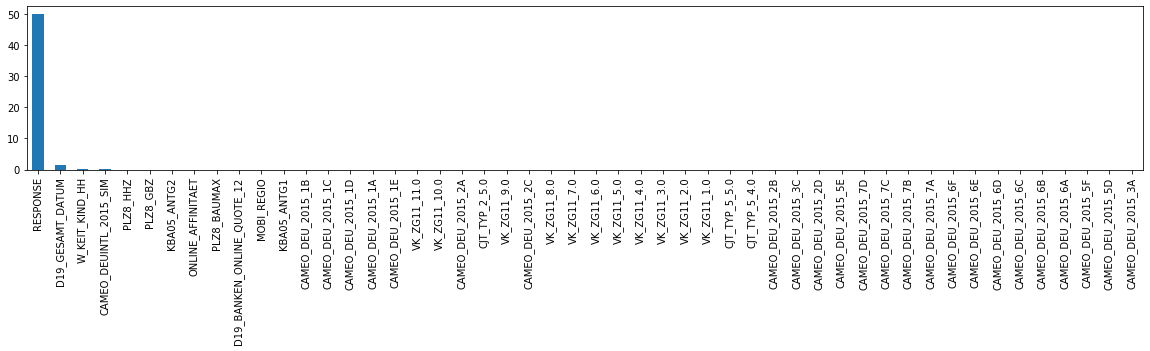

In [83]:
%%time
empty_cells = pd.isnull(joint_dataset_imputed_df).sum()*100.0/joint_dataset_imputed_df.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

empty_cells = pd.DataFrame({'attribute':empty_cells.index, 'missingness':empty_cells})
#empty_cells = empty_cells[empty_cells['attribute']!='RESPONSE']
empty_cells

**a second round of imputation with frequency imputer**|

In [93]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'most_frequent')

original_responses = joint_dataset_imputed_df['RESPONSE']

joint_dataset_imputed_df = pd.DataFrame(imputer.fit_transform(joint_dataset_imputed_df),columns= joint_dataset_imputed_df.columns)
joint_dataset_imputed_df['RESPONSE'] = original_responses




CPU times: user 142 ms, sys: 3.95 ms, total: 146 ms
Wall time: 144 ms


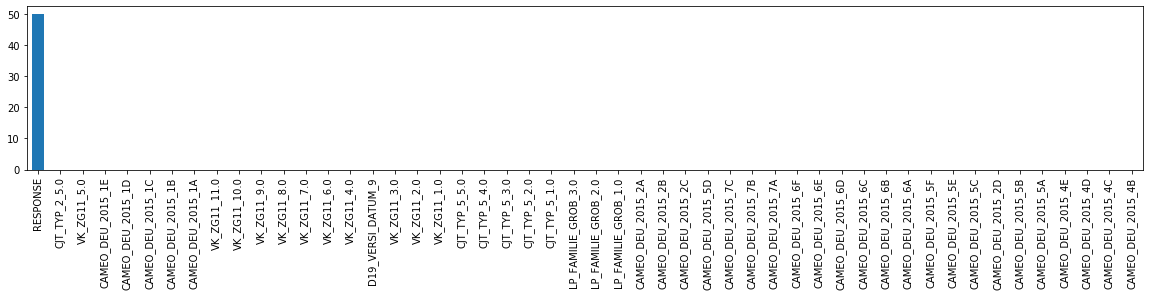

In [94]:
%%time
empty_cells = pd.isnull(joint_dataset_imputed_df).sum()*100.0/joint_dataset_imputed_df.shape[0]
empty_cells = empty_cells.sort_values(ascending=False)
empty_cells[:50].plot(figsize=(20,3),kind='bar') # bar plot of first 50 most missing features

In [95]:
joint_dataset_imputed_df.to_csv("../arvato_data_processed/MAILOUTimputed.csv")